In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
import seaborn as sns; sns.set() # for plot styling
from scipy import stats
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from scipy.stats import zscore
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

# Q1)1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.

In [5]:
election= pd.read_excel("Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes",index_col=0)

In [7]:
election.head(10)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,Labour,43,3,3,4,1,2,2,female
2,Labour,36,4,4,4,4,5,2,male
3,Labour,35,4,4,5,2,3,2,male
4,Labour,24,4,2,2,1,4,0,female
5,Labour,41,2,2,1,1,6,2,male
6,Labour,47,3,4,4,4,4,2,male
7,Labour,57,2,2,4,4,11,2,male
8,Labour,77,3,4,4,1,1,0,male
9,Labour,39,3,3,4,4,11,0,female
10,Labour,70,3,2,5,1,11,2,male


In [9]:
election.shape


(1525, 9)

In [11]:
election.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [13]:
election.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1525 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 119.1+ KB


In [15]:
election.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [17]:
replace = {
    "gender" : {"male" : 1 , "female" : 0},
    "vote"  :  { "Conservative" : 1, "Labour" : 0}
}

In [19]:
election = election.replace(replace)

In [21]:
election["gender"].value_counts()

gender
0    812
1    713
Name: count, dtype: int64

In [23]:
election["vote"].value_counts()

vote
0    1063
1     462
Name: count, dtype: int64

In [25]:
data = election[election.duplicated()]
data.head(1525)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
68,0,35,4,4,5,2,3,2,1
627,0,39,3,4,4,2,5,2,1
871,0,38,2,4,2,2,4,3,1
984,1,74,4,3,2,4,8,2,0
1155,1,53,3,4,2,2,6,0,0
1237,0,36,3,3,2,2,6,2,0
1245,0,29,4,4,4,2,2,2,0
1439,0,40,4,3,4,2,2,2,1


In [27]:
election.skew()

vote                       0.858449
age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
gender                     0.130239
dtype: float64

# Q2)Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

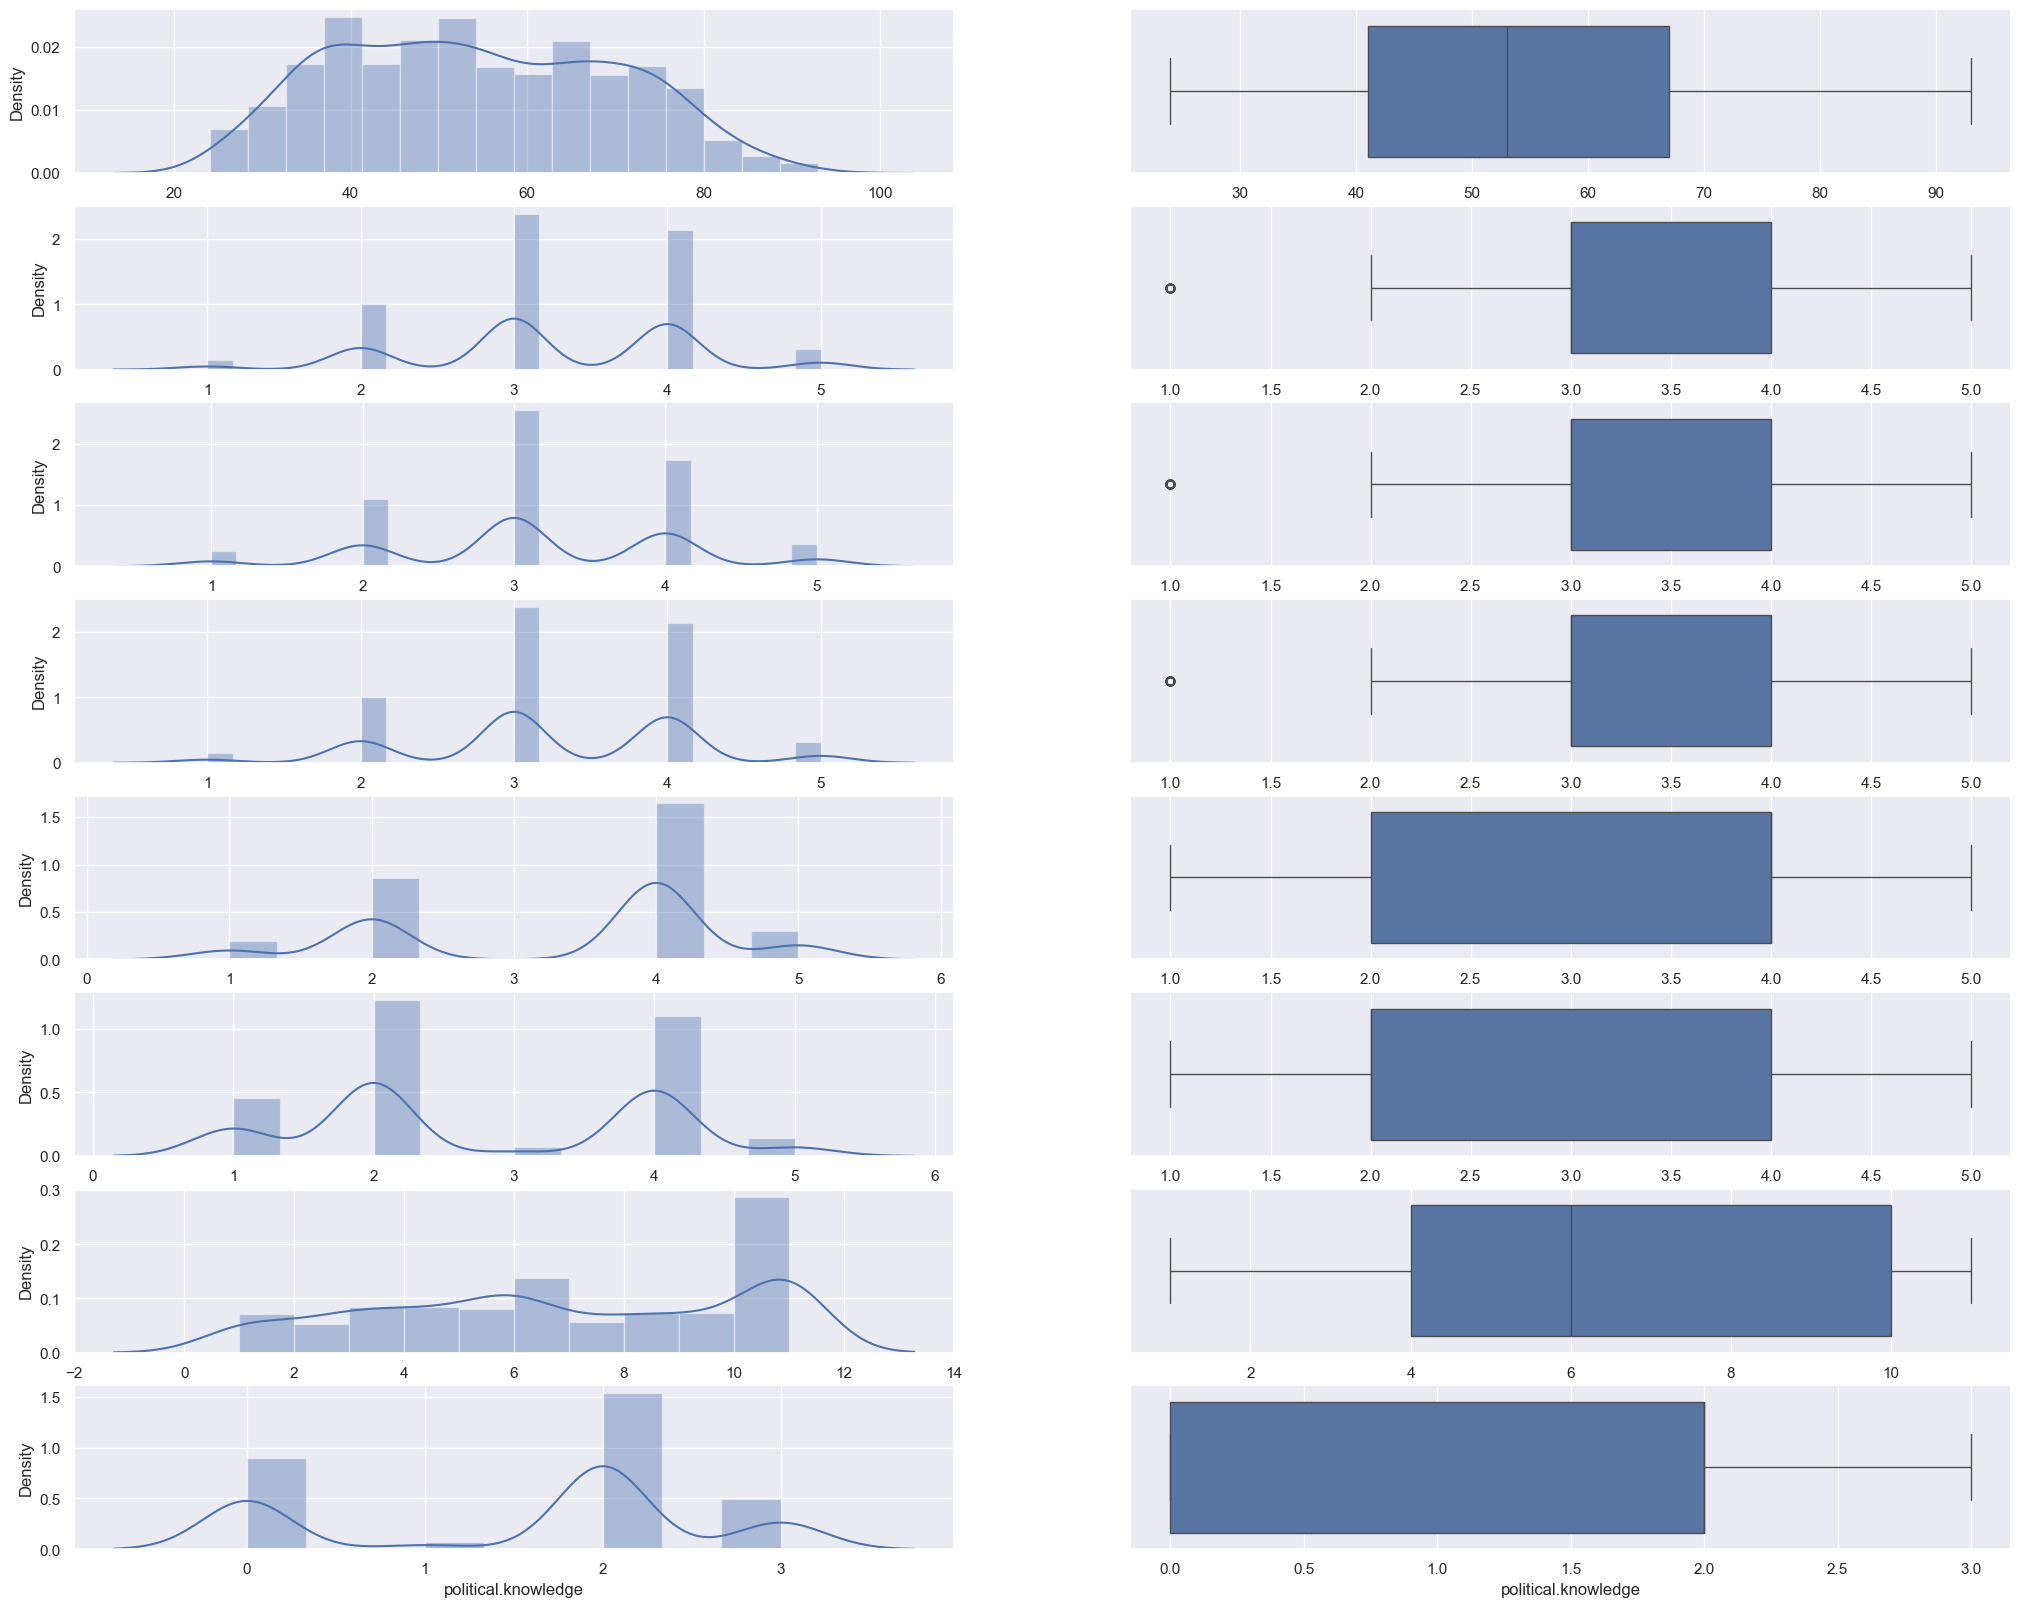

In [31]:

fig, axes = plt.subplots(nrows=8,ncols=2)
fig.set_size_inches(25,20)
sns.distplot(election['age'], kde=True, ax=axes[0][0])
sns.boxplot(x='age', data=election, ax=axes[0][1])
sns.distplot(election['economic.cond.national'] , kde=True, ax=axes[1][0])
sns.boxplot(x='economic.cond.national', data=election , ax=axes[1][1])
sns.distplot(election['economic.cond.household'], kde=True, ax=axes[2][0])
sns.boxplot(x='economic.cond.household', data=election, ax=axes[2][1])
sns.distplot(election['economic.cond.national'] , kde=True, ax=axes[3][0])
sns.boxplot(x='economic.cond.national', data=election , ax=axes[3][1])
sns.distplot(election['Blair'], kde=True, ax=axes[4][0])
sns.boxplot(x='Blair', data=election, ax=axes[4][1])
sns.distplot(election['Hague'] , kde=True, ax=axes[5][0])
sns.boxplot(x='Hague', data=election , ax=axes[5][1])
sns.distplot(election['Europe'] , kde=True, ax=axes[6][0])
sns.boxplot(x='Europe', data=election , ax=axes[6][1])
sns.distplot(election['political.knowledge'], kde=True, ax=axes[7][0])
sns.boxplot(x='political.knowledge', data=election, ax=axes[7][1])




plt.show()

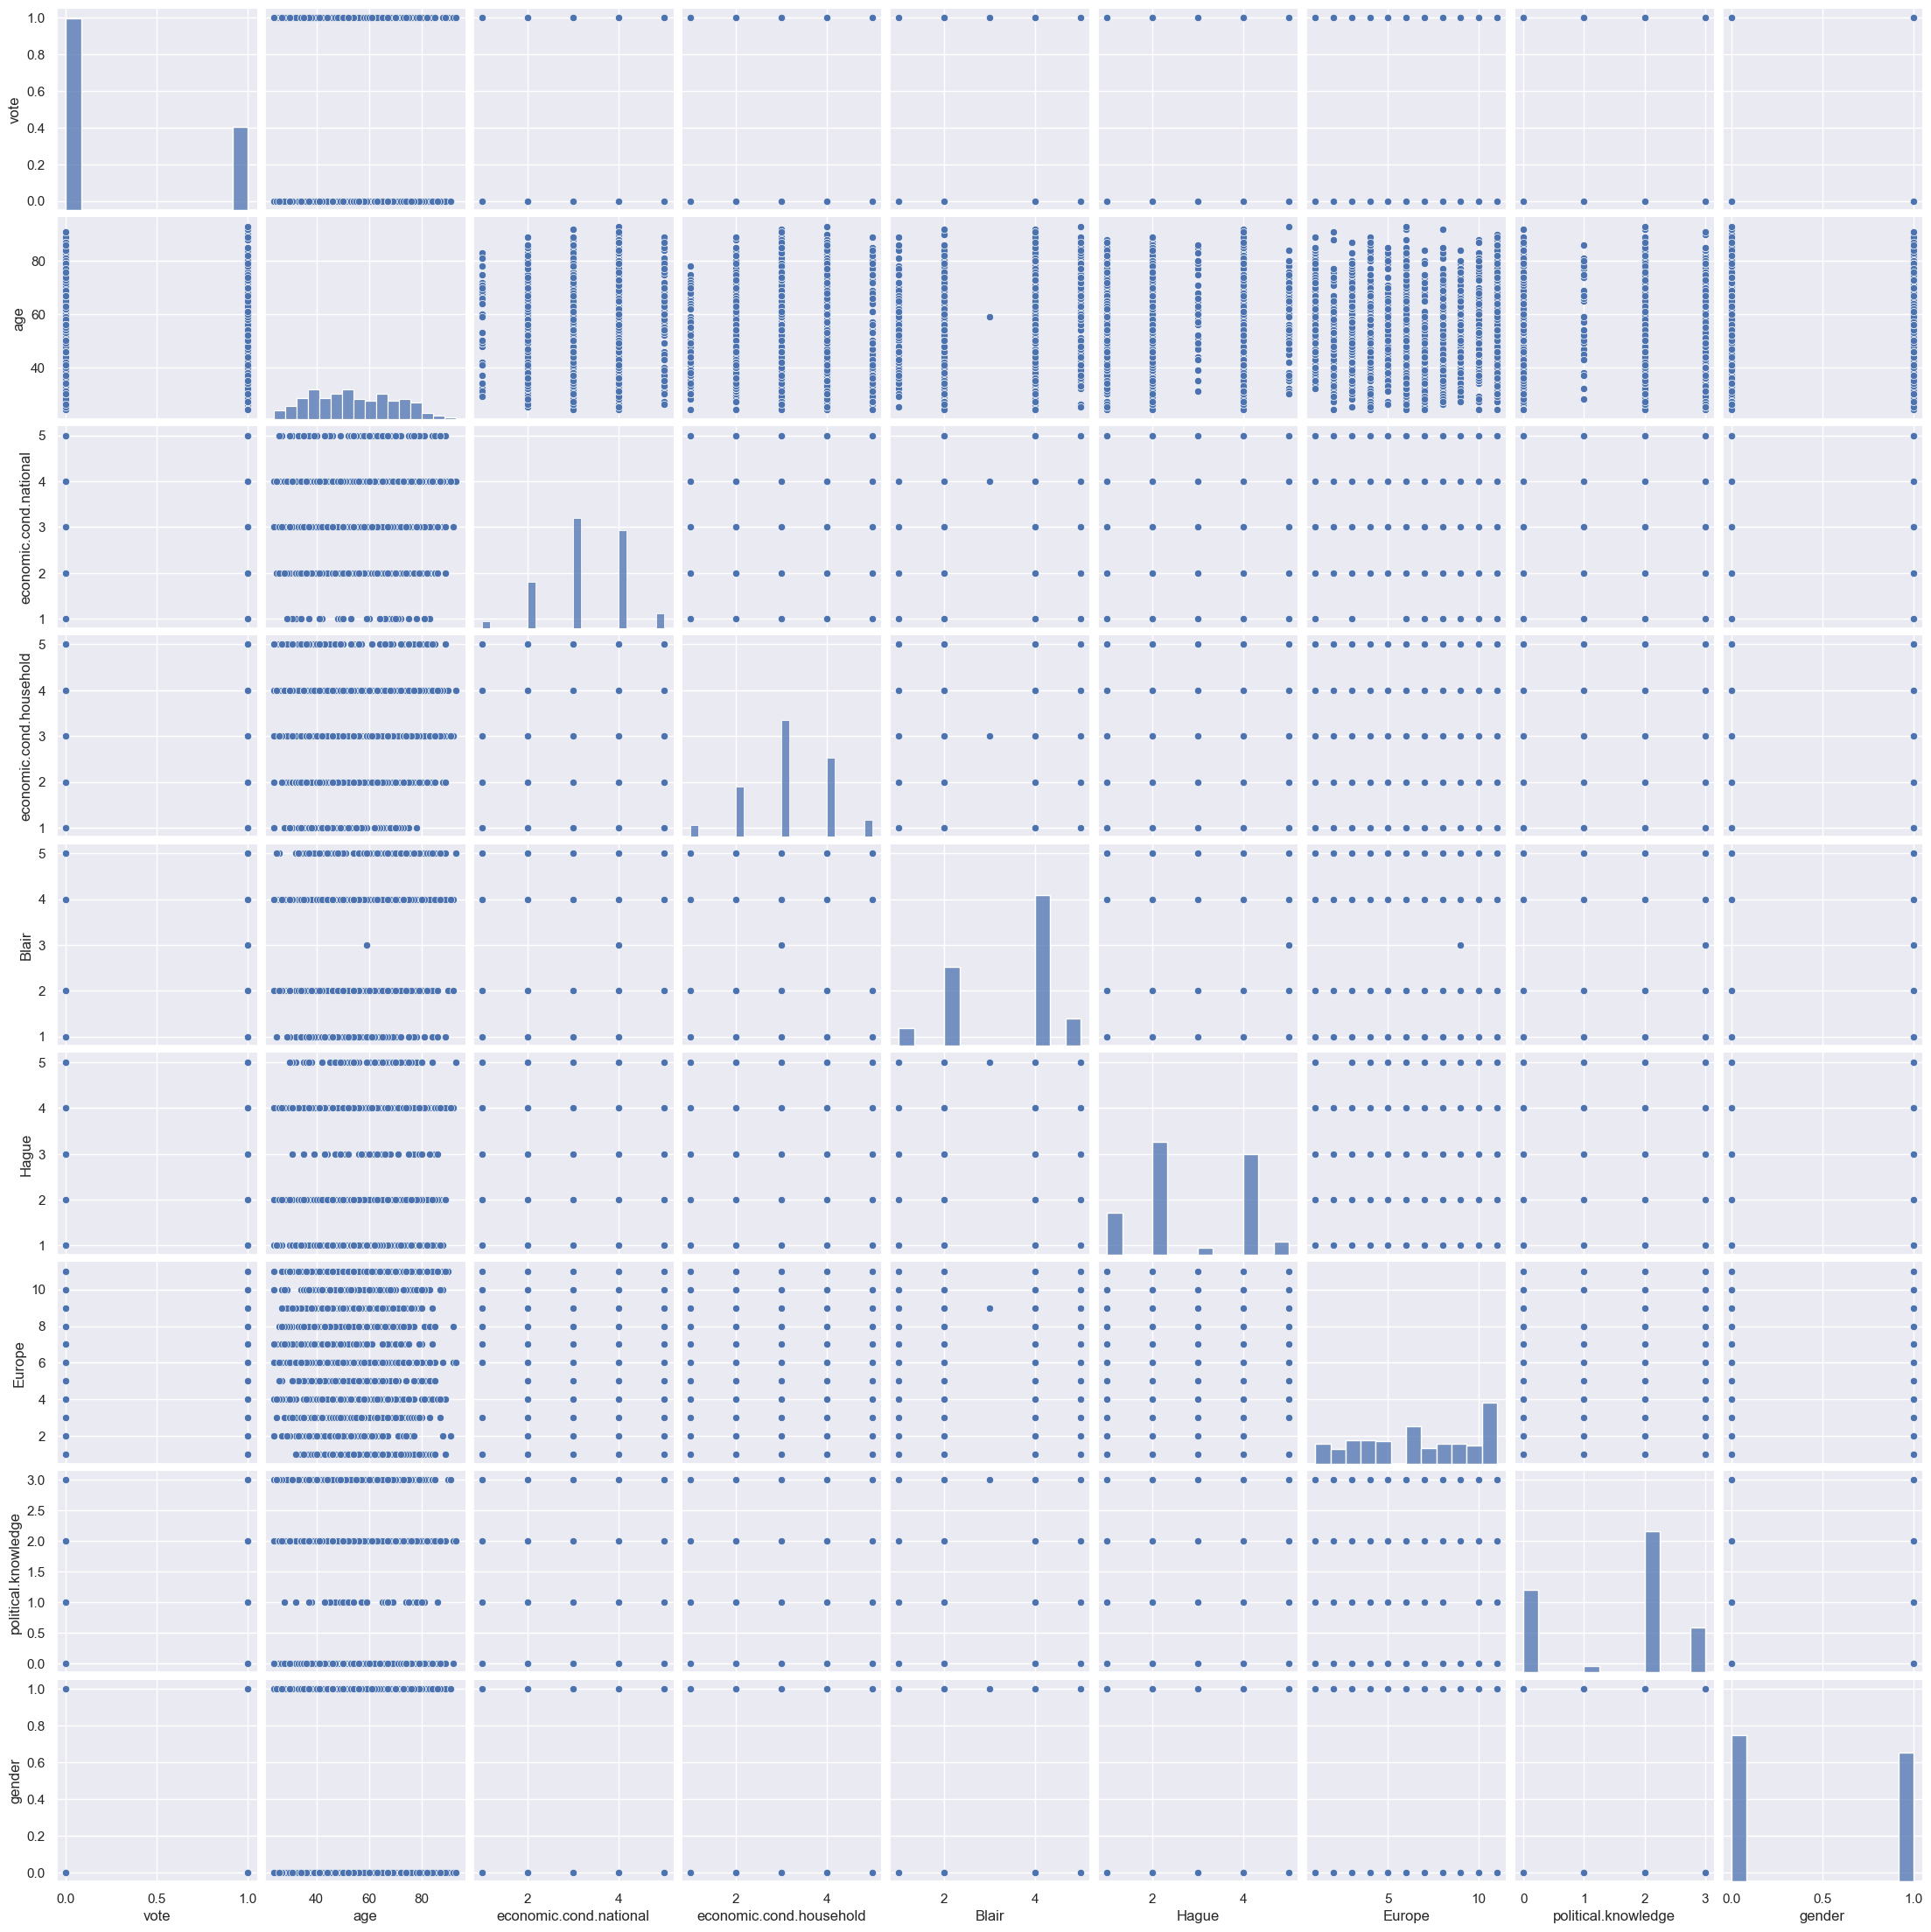

In [33]:
sns.pairplot(election)

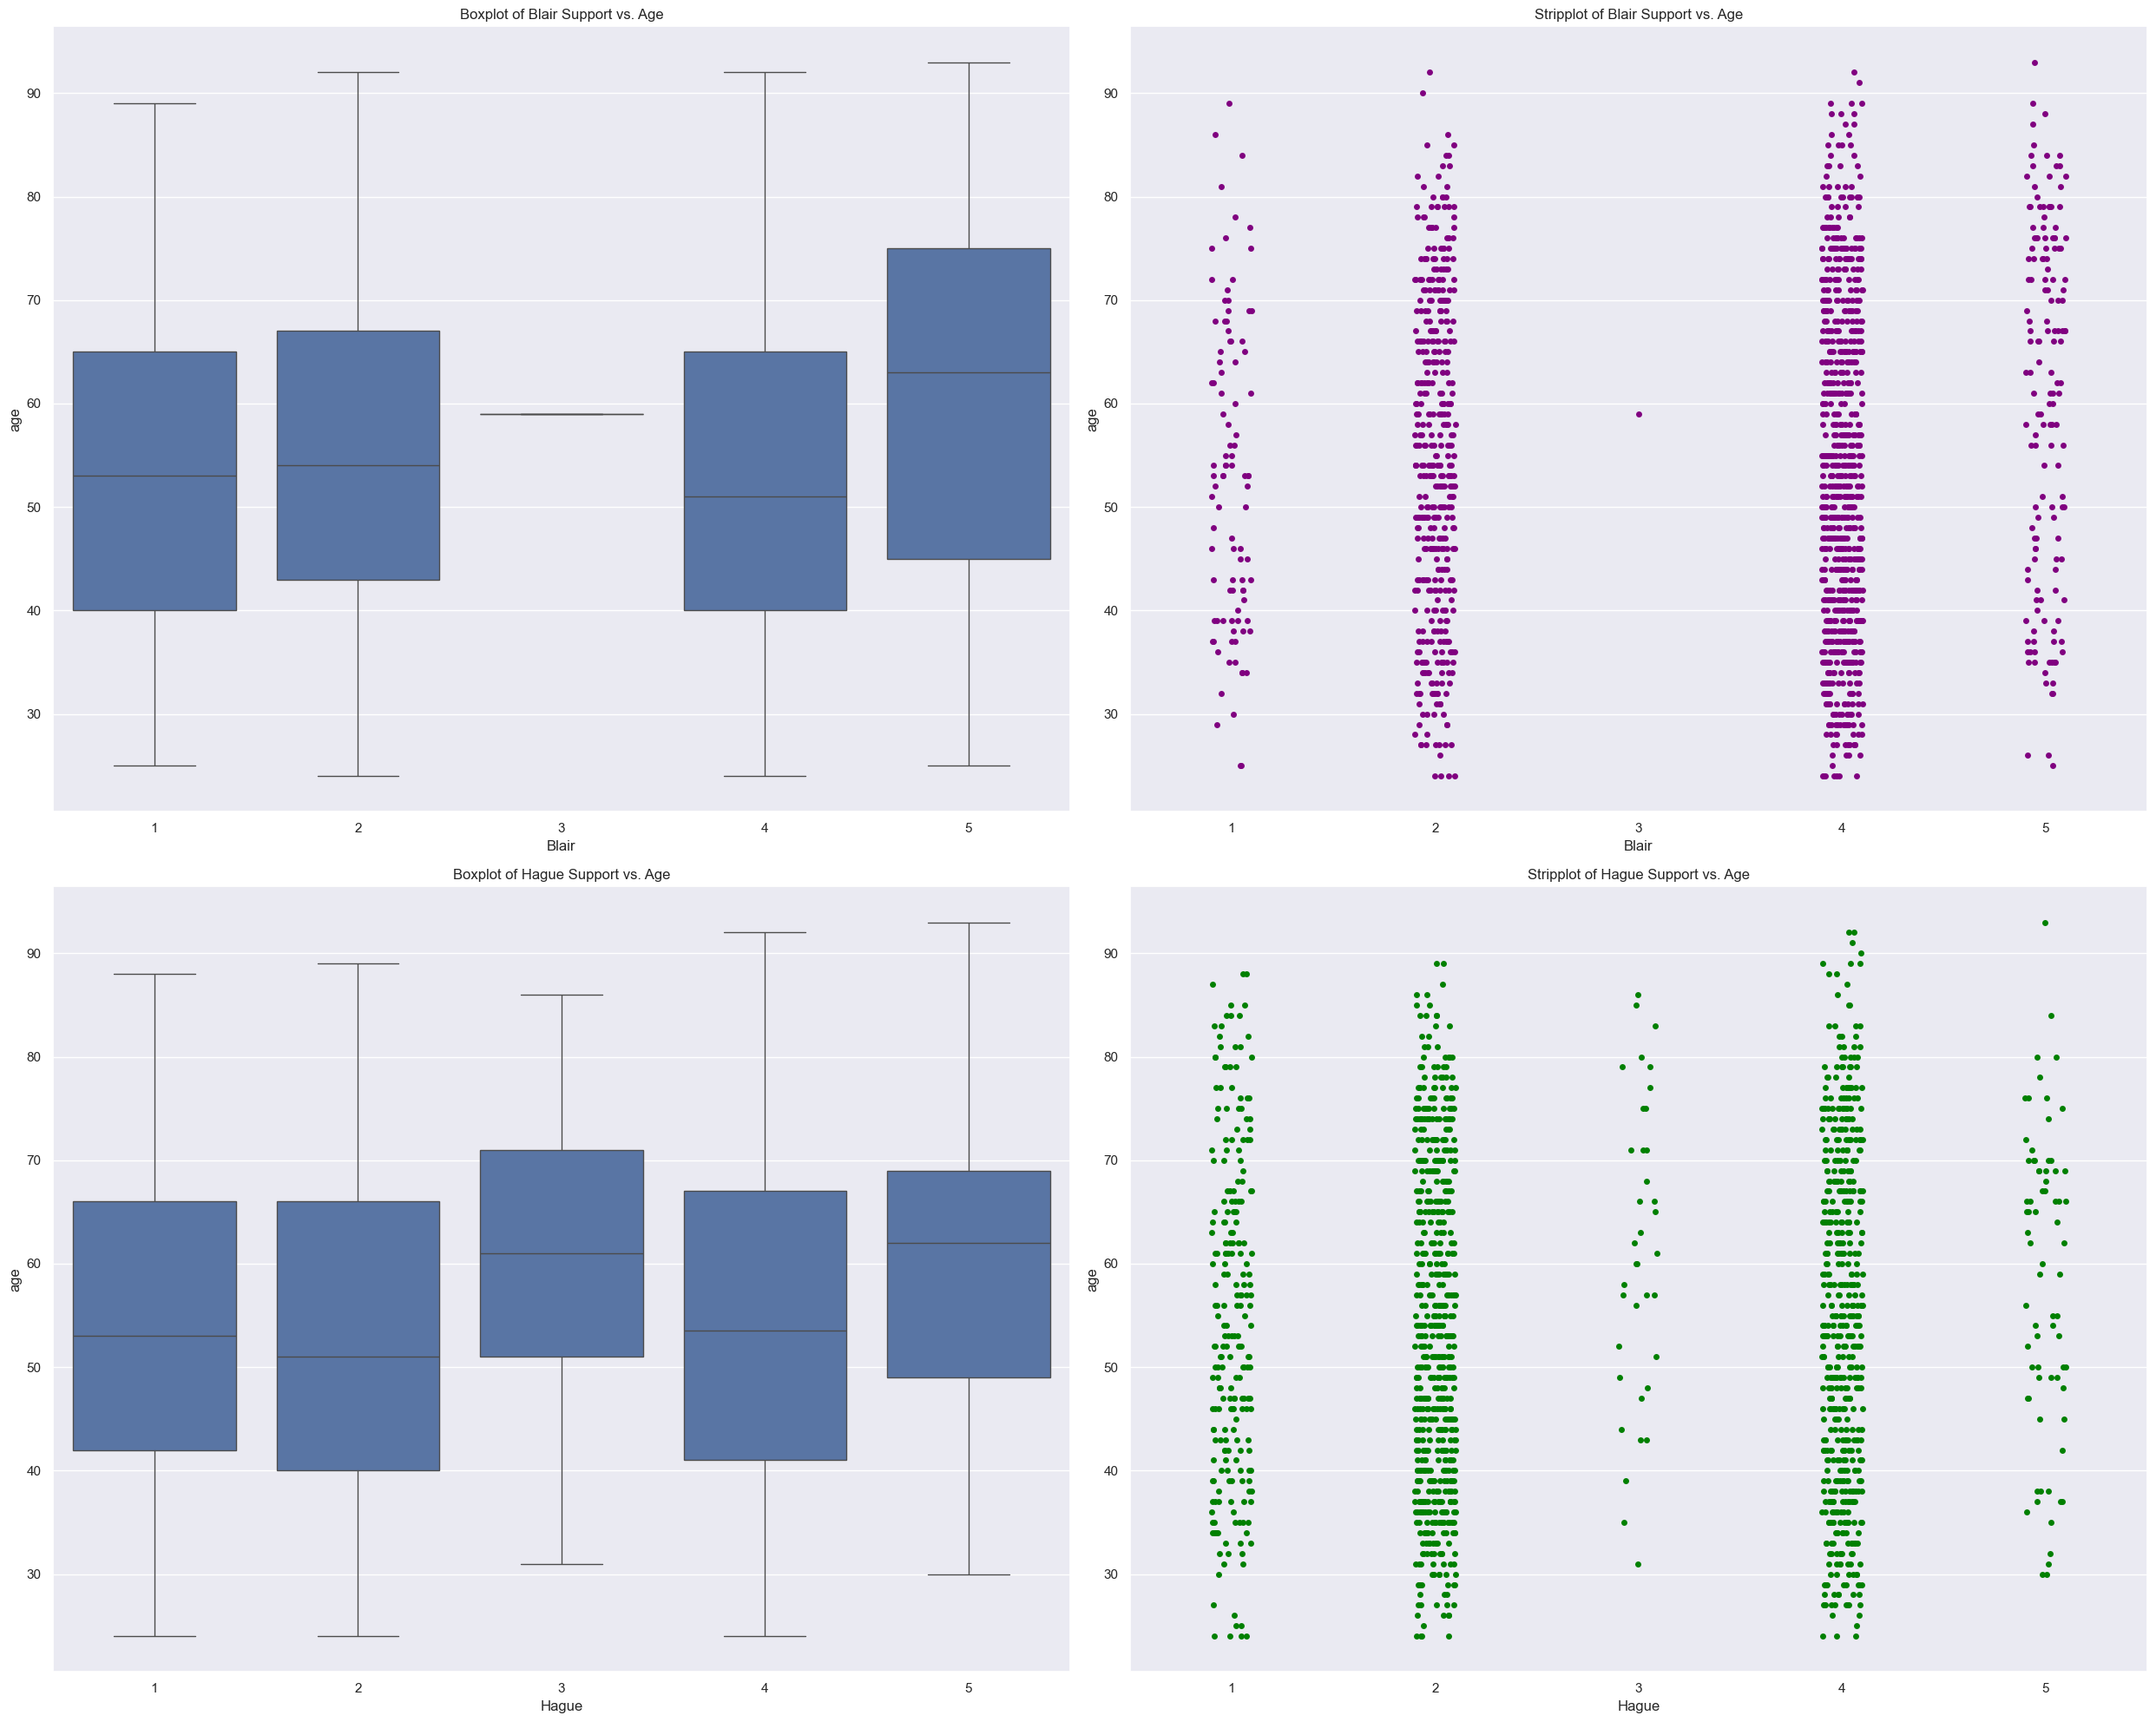

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the figure and axes for the subplots
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(25, 20)

# Replace 'election' with your actual DataFrame name
# Boxplot and stripplot for Blair vs. Age
sns.boxplot(x=election["Blair"], y=election["age"], ax=axes[0][0])
axes[0][0].set_title("Boxplot of Blair Support vs. Age")

sns.stripplot(x=election["Blair"], y=election["age"], ax=axes[0][1], color='purple')
axes[0][1].set_title("Stripplot of Blair Support vs. Age")

# Boxplot and stripplot for Hague vs. Age
sns.boxplot(x=election["Hague"], y=election["age"], ax=axes[1][0])
axes[1][0].set_title("Boxplot of Hague Support vs. Age")

sns.stripplot(x=election["Hague"], y=election["age"], ax=axes[1][1], color='green')
axes[1][1].set_title("Stripplot of Hague Support vs. Age")

# Adjust layout for better readability
plt.tight_layout()
plt.show()


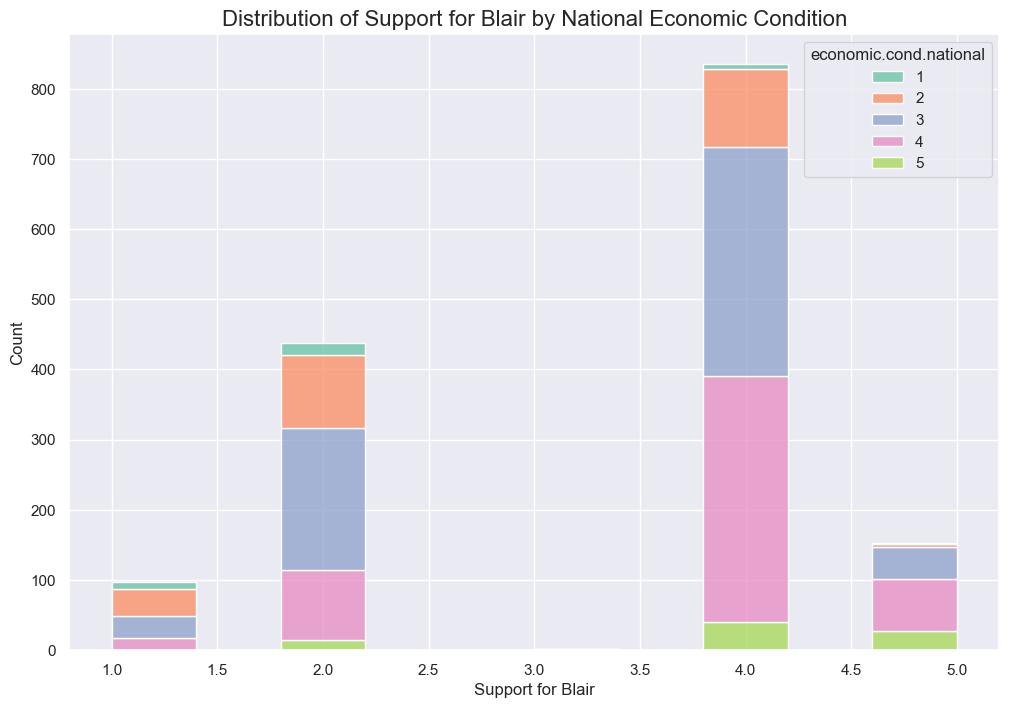

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a distinct color palette
color_palette = sns.color_palette("Set2", 5)

# Create the histogram plot with legend configuration for Hague
plt.figure(figsize=(12, 8))
plot = sns.histplot(data=election, x="Blair", hue="economic.cond.national", multiple="stack", 
                    palette=color_palette, bins=10)

# Add title and labels
plt.title("Distribution of Support for Blair by National Economic Condition", fontsize=16)
plt.xlabel("Support for Blair")
plt.ylabel("Count")


# Show the plot
plt.show()

Text(0, 0.5, 'Count')

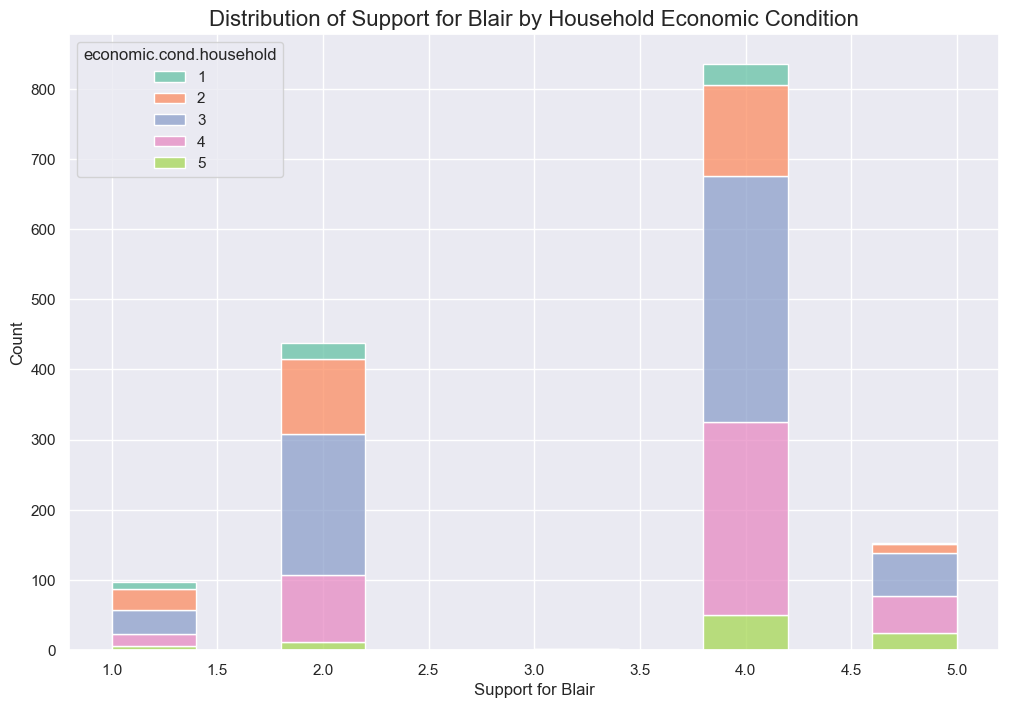

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a distinct color palette
color_palette = sns.color_palette("Set2", 5)

# Create the histogram plot with legend configuration
plt.figure(figsize=(12, 8))
plot = sns.histplot(data=election, x="Blair", hue="economic.cond.household", multiple="stack", 
                    palette=color_palette, bins=10)

# Add title and labels
plt.title("Distribution of Support for Blair by Household Economic Condition", fontsize=16)
plt.xlabel("Support for Blair")
plt.ylabel("Count")


Text(0, 0.5, 'Count')

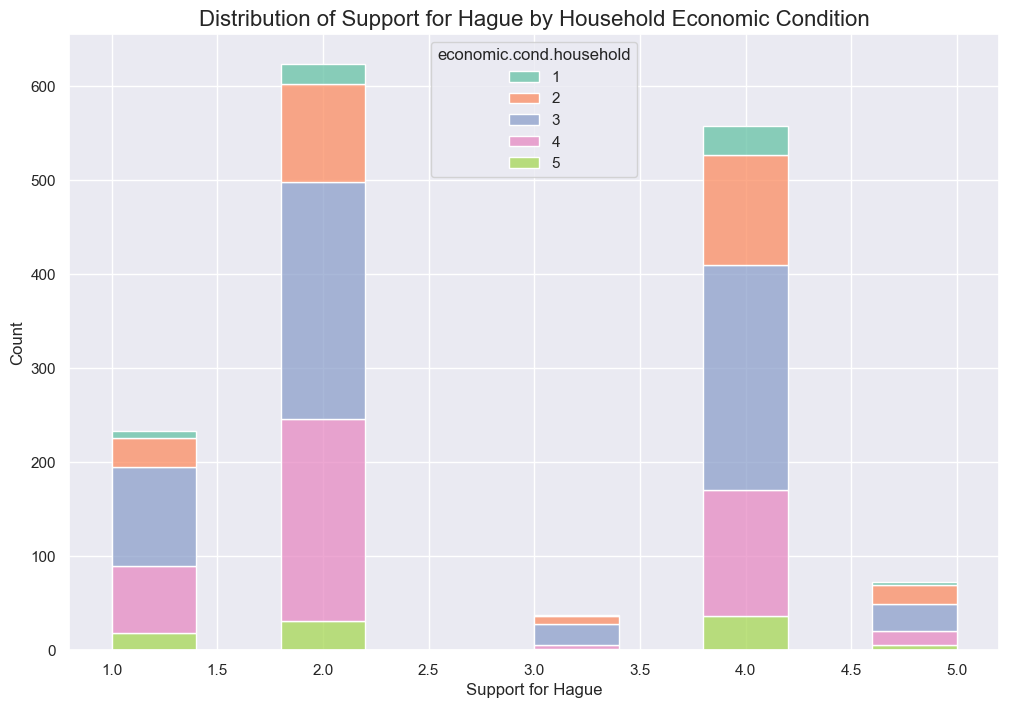

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a distinct color palette
color_palette = sns.color_palette("Set2", 5)

# Create the histogram plot with legend configuration
plt.figure(figsize=(12, 8))
plot = sns.histplot(data=election, x="Hague", hue="economic.cond.household", multiple="stack", 
                    palette=color_palette, bins=10)

# Add title and labels
plt.title("Distribution of Support for Hague by Household Economic Condition", fontsize=16)
plt.xlabel("Support for Hague")
plt.ylabel("Count")


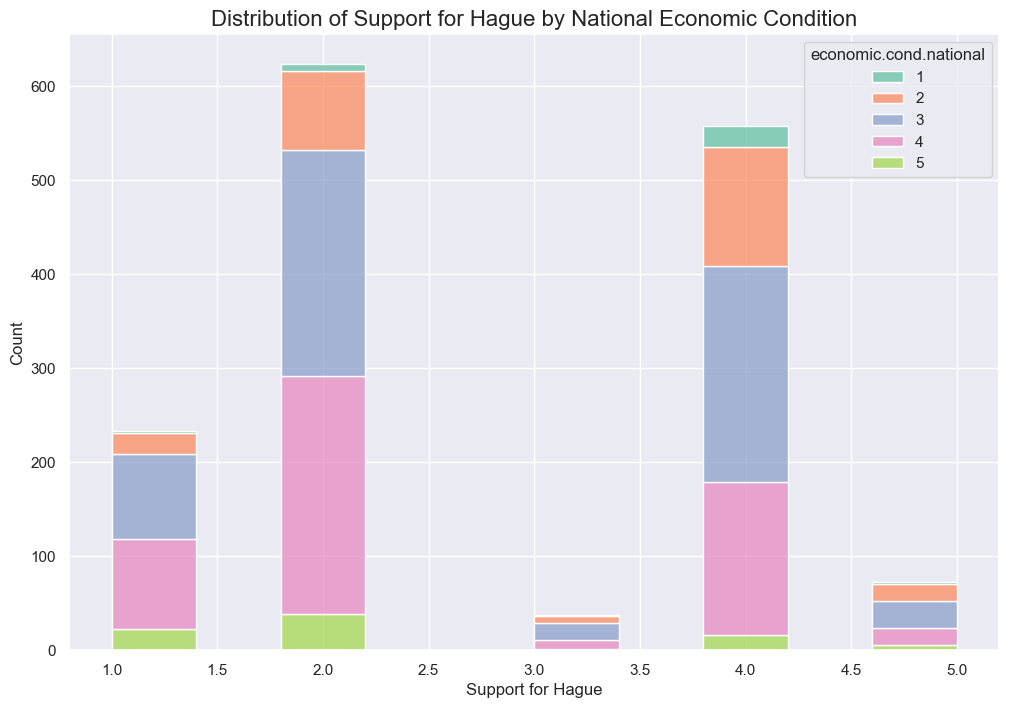

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a distinct color palette
color_palette = sns.color_palette("Set2", 5)

# Create the histogram plot with legend configuration for Hague
plt.figure(figsize=(12, 8))
plot = sns.histplot(data=election, x="Hague", hue="economic.cond.national", multiple="stack", 
                    palette=color_palette, bins=10)

# Add title and labels
plt.title("Distribution of Support for Hague by National Economic Condition", fontsize=16)
plt.xlabel("Support for Hague")
plt.ylabel("Count")

# Show the plot
plt.show()

<Axes: xlabel='Blair', ylabel='Count'>

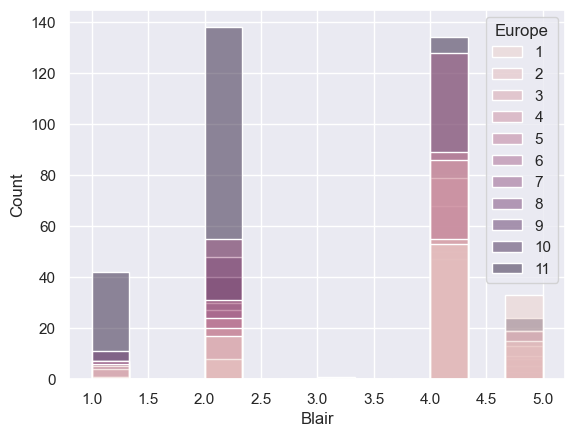

In [61]:
sns.histplot(data =election , x = "Blair", hue = "Europe")

<Axes: xlabel='Hague', ylabel='Count'>

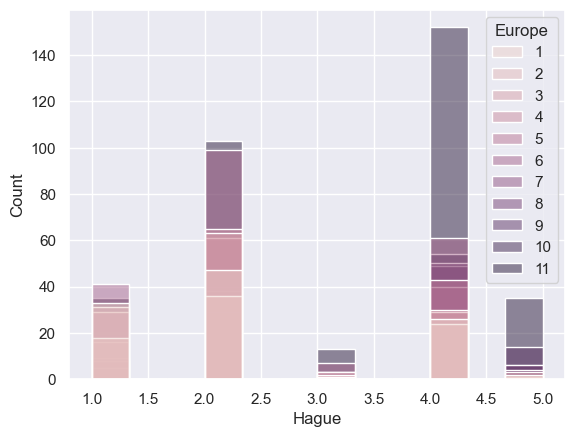

In [63]:
sns.histplot(data =election , x = "Hague", hue = "Europe")

<Axes: xlabel='Hague', ylabel='Count'>

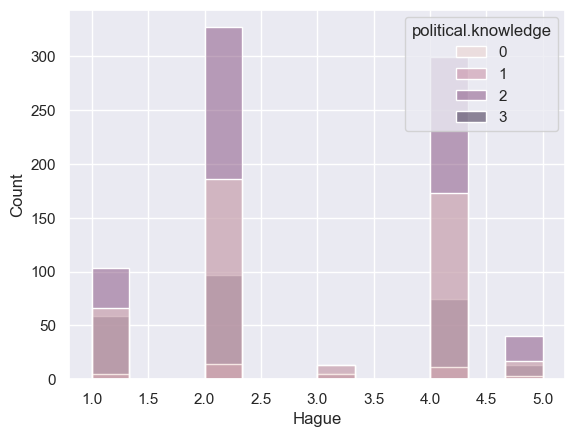

In [65]:
sns.histplot(data =election , x = "Hague", hue = "political.knowledge")

<Axes: xlabel='Hague', ylabel='Count'>

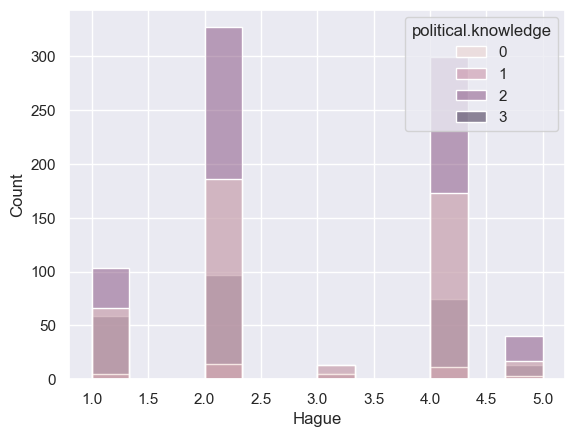

In [67]:
sns.histplot(data =election , x = "Hague", hue = "political.knowledge")

In [69]:
covMatrix = np.cov(election,bias=True)
print (covMatrix)

[[168.69135802 135.48148148 133.34567901 ... 141.51851852 234.92592593
  289.54320988]
 [135.48148148 110.         107.40740741 ... 114.11111111 191.11111111
  235.14814815]
 [133.34567901 107.40740741 105.72839506 ... 112.03703704 185.40740741
  228.60493827]
 ...
 [141.51851852 114.11111111 112.03703704 ... 119.55555556 196.88888889
  242.96296296]
 [234.92592593 191.11111111 185.40740741 ... 196.88888889 338.
  414.59259259]
 [289.54320988 235.14814815 228.60493827 ... 242.96296296 414.59259259
  509.50617284]]


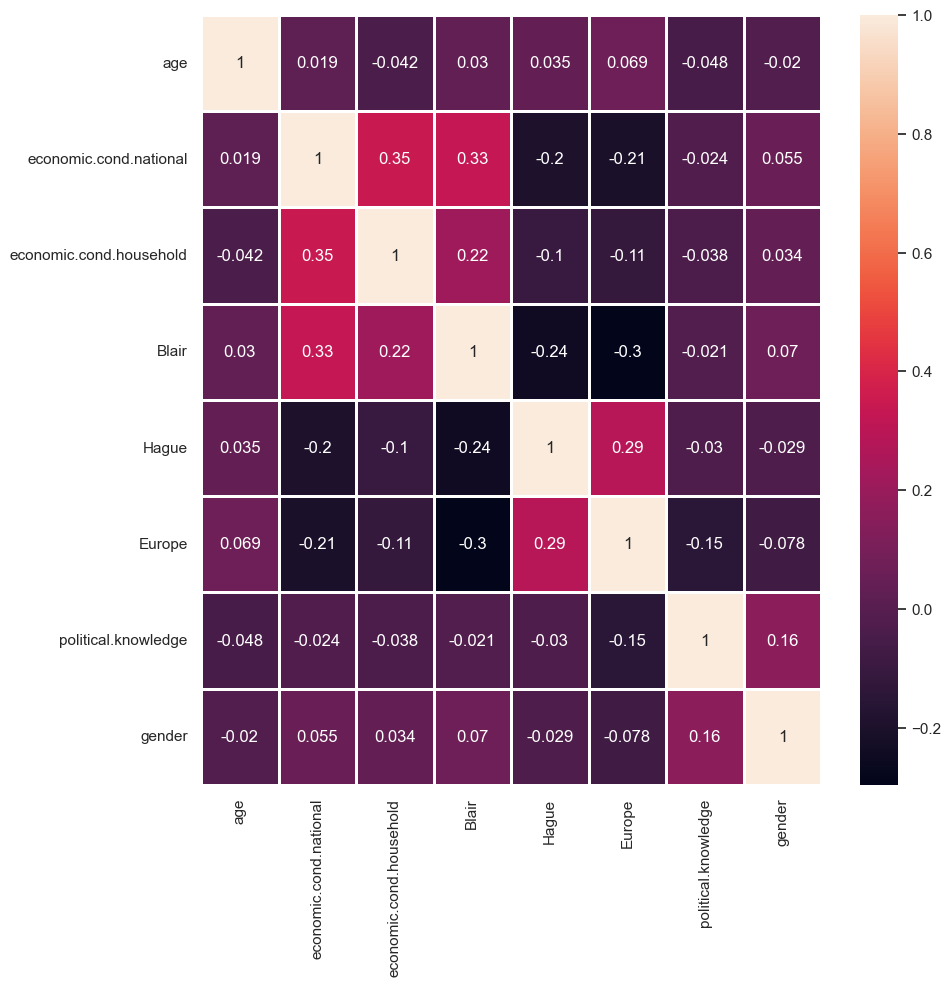

In [89]:
fig, ax = plt.subplots(figsize=(10,10)) 
dataplot = sns.heatmap(election.corr(), annot=True,linewidth = 1)

# Q3)Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test

In [75]:
#from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(election)
scaled

In [77]:

from sklearn.model_selection import train_test_split

In [79]:
x = election.drop("vote",axis = 1)
y = election.pop("vote")

In [81]:
#x = np.linspace(0, 2*np.pi, 8)
#y = np.sin(x) + np.random.normal(0, 0.4, 8)

In [83]:
#x = x.reshape(-1, 1)

In [85]:
x_train,x_test , y_train, y_test = train_test_split(x,y,test_size = .30 ,random_state = 1)

# Apply Logistic Regression and LDA (Linear Discriminant Analysis)

In [95]:
from sklearn.linear_model import LogisticRegression

In [97]:
lr = LogisticRegression(tol=0.0001,max_iter=2000,random_state= 0)

In [99]:
lr.fit(x_train,y_train)


LogisticRegression(max_iter=2000, random_state=0)

In [101]:
y_train_predict=lr.predict(x_train)

In [103]:
from sklearn.metrics import classification_report,confusion_matrix

In [105]:
print(classification_report(y_train ,y_train_predict))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       735
           1       0.77      0.69      0.73       332

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



Axes(0.125,0.11;0.62x0.77)


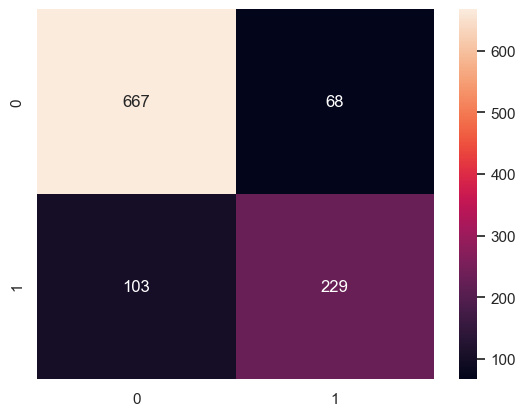

In [109]:
print(sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True , fmt="2g"))

In [111]:
print(confusion_matrix(y_test,lr.predict(x_test)))
print(classification_report(y_test,lr.predict(x_test)))

[[292  36]
 [ 45  85]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       328
           1       0.70      0.65      0.68       130

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



In [113]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train_predict, y_train))

0.16026241799437677


In [125]:
print(mean_squared_error(lr.predict(x_test), y_test))

0.17685589519650655


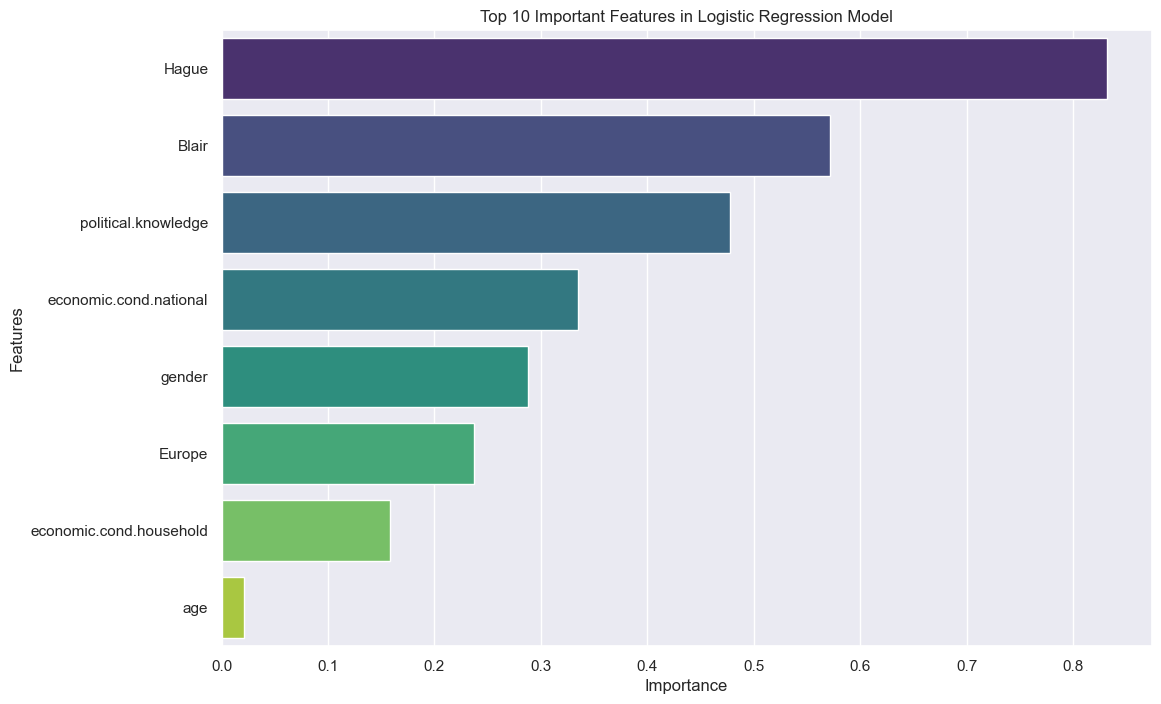

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Make sure 'logreg' is the fitted logistic regression model and 'X' is the DataFrame of predictors
# Fitting example (if not already done):
# logreg = LogisticRegression().fit(X, y)

# Check if the model is fitted, and then extract coefficients
if hasattr(lr, "coef_"):
    # Extract feature names and corresponding coefficients
    feature_importance = pd.DataFrame({
        'Feature': x.columns,
        'Importance': np.abs(lr.coef_[0])  # Taking absolute value of coefficients
    }).sort_values(by='Importance', ascending=False)

    # Plot the top 10 features by importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette="viridis")
    plt.title("Top 10 Important Features in Logistic Regression Model")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()
else:
    print("Error: The logistic regression model 'logreg' has not been fitted yet.")


In [133]:
from sklearn.metrics import roc_auc_score,roc_curve

AUC: 0.889


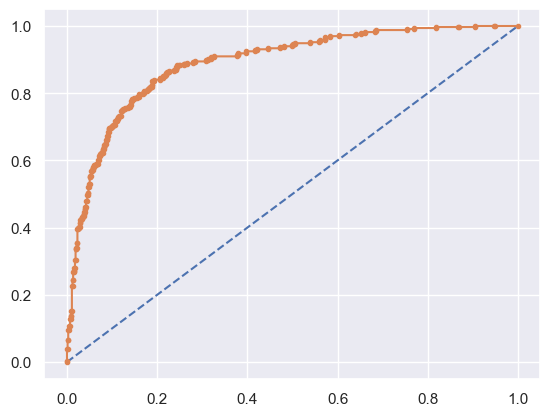

In [135]:
# AUC and ROC for the training data

# predict probabilities
probs = lr.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.882


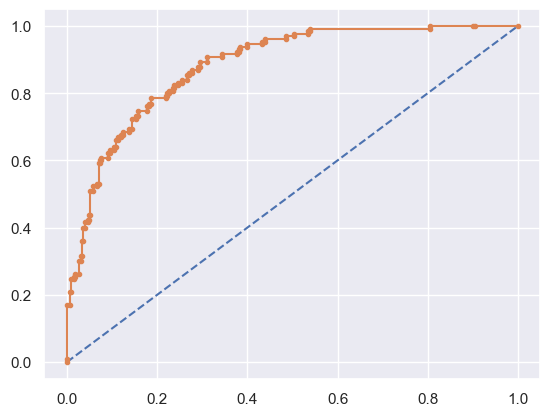

In [139]:
# AUC and ROC for the test data

# predict probabilities
probs = lr.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

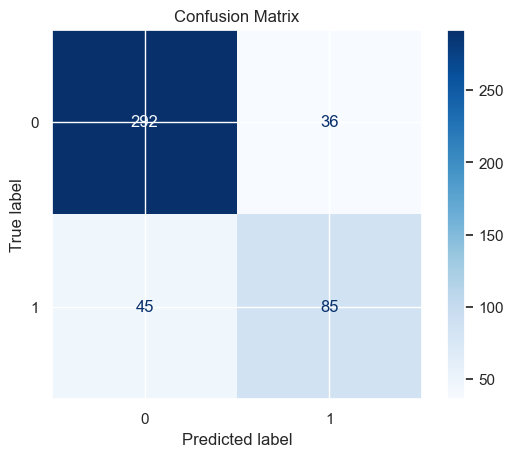

In [143]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test data
y_pred = lr.predict(x_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


# Linear Discriminant Analysis

In [46]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [47]:
lda = LinearDiscriminantAnalysis()

In [48]:
lda = lda.fit(x_train,y_train)

In [49]:
print(confusion_matrix(lda.predict(x_train),y_train))
print(classification_report(lda.predict(x_train),y_train))

[[660  97]
 [ 75 235]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       757
           1       0.71      0.76      0.73       310

    accuracy                           0.84      1067
   macro avg       0.80      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [50]:
print(confusion_matrix(lda.predict(x_test),y_test))
print(classification_report(lda.predict(x_test),y_test))

[[289  44]
 [ 39  86]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       333
           1       0.66      0.69      0.67       125

    accuracy                           0.82       458
   macro avg       0.77      0.78      0.77       458
weighted avg       0.82      0.82      0.82       458



AUC: 0.889


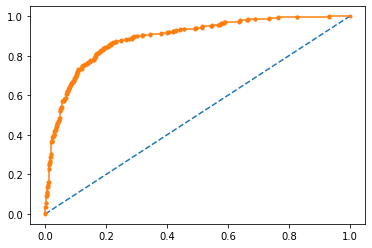

In [51]:
# AUC and ROC for the training data

# predict probabilities
probs = lda.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

AUC: 0.884


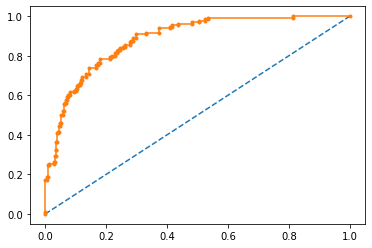

In [52]:
# AUC and ROC for the test data

# predict probabilities
probs = lda.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Q5)Apply KNN Model and Naïve Bayes Model. Interpret the results.

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [60]:
knn = knn.fit(x_train,y_train)

In [64]:
pred_label= knn.predict(x_test)
knn.score(x_test,y_test)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.648471615720524

In [69]:
print(confusion_matrix(knn.predict(x_train),y_train))


[[672 154]
 [ 63 178]]


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [71]:
print(classification_report(knn.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76       351
           1       0.29      0.36      0.32       107

    accuracy                           0.65       458
   macro avg       0.54      0.55      0.54       458
weighted avg       0.67      0.65      0.66       458



c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


AUC: 0.843


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


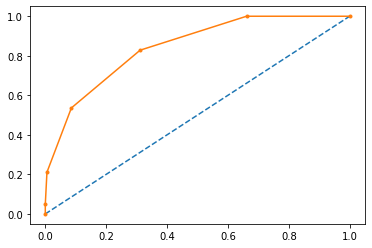

In [72]:
# AUC and ROC for the training data

# predict probabilities
probs = knn.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot

AUC: 0.596


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


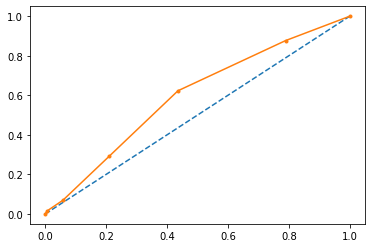

In [73]:

# predict probabilities
probs = knn.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# naive bayes

In [74]:
from sklearn.naive_bayes import GaussianNB

In [75]:
nb=GaussianNB()

In [76]:
nb= nb.fit(x_train, y_train)

In [77]:
print(confusion_matrix(nb.predict(x_train),y_train))
print(classification_report(nb.predict(x_train),y_train))

[[653  90]
 [ 82 242]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       743
           1       0.73      0.75      0.74       324

    accuracy                           0.84      1067
   macro avg       0.81      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [78]:
print(confusion_matrix(nb.predict(x_test),y_test))
print(classification_report(nb.predict(x_test),y_test))

[[282  36]
 [ 46  94]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       318
           1       0.72      0.67      0.70       140

    accuracy                           0.82       458
   macro avg       0.79      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



AUC: 0.888


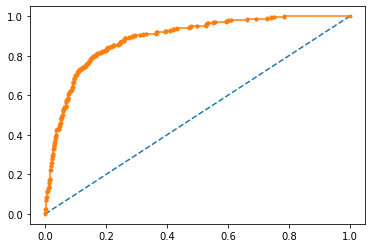

In [79]:
# AUC and ROC for the training data

# predict probabilities
probs = nb.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

AUC: 0.886


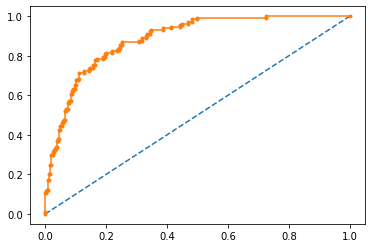

In [80]:
# predict probabilities
probs = nb.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Q6)Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

In [83]:
param_grid = {
    'n_estimators' : [100,500,1000],
    'learning_rate' : [0.1,0.01,0.001],
    'algorithm' : ['SAMME', 'SAMME.R']
}

In [84]:
ADB_model=AdaBoostClassifier()

In [85]:
grid_search=GridSearchCV(estimator=ADB_model,param_grid=param_grid)

In [86]:
grid_search.fit(x_train,y_train)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoo

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoo

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoo

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [100, 500, 1000]})

In [87]:
ADB_model=grid_search.best_estimator_

In [88]:
ADB_model.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=1000)

In [89]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(x_train)
model_score = ADB_model.score(x_train, y_train)
print(model_score)
print(confusion_matrix(y_train, y_train_predict))
print(classification_report(y_train, y_train_predict))

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


0.8622305529522024
[[672  63]
 [ 84 248]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       735
           1       0.80      0.75      0.77       332

    accuracy                           0.86      1067
   macro avg       0.84      0.83      0.84      1067
weighted avg       0.86      0.86      0.86      1067



c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


AUC: 0.929


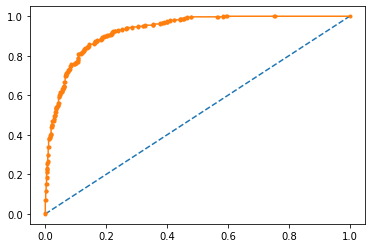

In [92]:
# AUC and ROC for the training data

# predict probabilities
probs = ADB_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [93]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(x_test)
model_score = ADB_model.score(x_test, y_test)
print(model_score)
print( confusion_matrix(y_test, y_test_predict))
print( classification_report(y_test, y_test_predict))

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


0.8144104803493449
[[288  40]
 [ 45  85]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       328
           1       0.68      0.65      0.67       130

    accuracy                           0.81       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.81      0.81      0.81       458



c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


AUC: 0.883


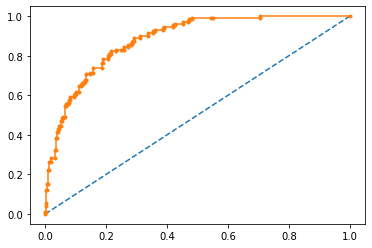

In [91]:
# predict probabilities
probs = ADB_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# decision tree

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
param_grid = {
    'min_samples_split' : [30,50,70,100],
    'min_samples_leaf':[15,25,35,50],
    'max_depth':[5,10,15,20],
    'random_state' : [0]
}

In [96]:
DT_model= DecisionTreeClassifier()

In [97]:
grid_search=GridSearchCV(estimator=DT_model,param_grid=param_grid,cv=10)

In [98]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [15, 25, 35, 50],
                         'min_samples_split': [30, 50, 70, 100],
                         'random_state': [0]})

In [99]:
DT_model=grid_search.best_estimator_

In [100]:
DT_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=15, min_samples_split=70,
                       random_state=0)

In [101]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(x_train)
model_score = DT_model.score(x_train, y_train)
print(model_score)
print( confusion_matrix(y_train, y_train_predict))
print( classification_report(y_train, y_train_predict))

0.837863167760075
[[663  72]
 [101 231]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       735
           1       0.76      0.70      0.73       332

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067



AUC: 0.896


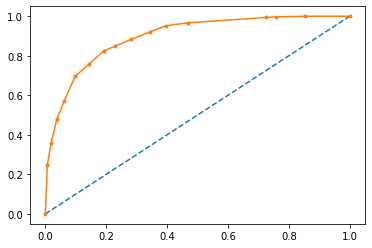

In [103]:
# AUC and ROC for the training data

# predict probabilities
probs = DT_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [104]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(x_test)
model_score = DT_model.score(x_test, y_test)
print(model_score)
print( confusion_matrix(y_test, y_test_predict))
print( classification_report(y_test, y_test_predict))

0.8144104803493449
[[285  43]
 [ 42  88]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       328
           1       0.67      0.68      0.67       130

    accuracy                           0.81       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.81      0.81      0.81       458



AUC: 0.870


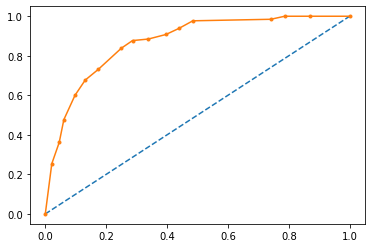

In [106]:
# predict probabilities
probs = DT_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Random forest

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
param_grid = {
    'min_samples_split' : [30,50,70,100],
    'min_samples_leaf':[15,25,35,50],
    'max_depth':[5,10,15,20],
    'random_state' : [0]
}

In [109]:

RF_model=RandomForestClassifier()

In [110]:
grid_search=GridSearchCV(estimator=RF_model,param_grid=param_grid,cv=10)

In [111]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [15, 25, 35, 50],
                         'min_samples_split': [30, 50, 70, 100],
                         'random_state': [0]})

In [112]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, min_samples_leaf=15, min_samples_split=50,
                       random_state=0)

In [113]:
RF_model=grid_search.best_estimator_

In [114]:
RF_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=15, min_samples_split=50,
                       random_state=0)

In [115]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(x_train)
model_score =RF_model.score(x_train, y_train)
print(model_score)
print( confusion_matrix(y_train, y_train_predict))
print( classification_report(y_train, y_train_predict))

0.8556701030927835
[[686  49]
 [105 227]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       735
           1       0.82      0.68      0.75       332

    accuracy                           0.86      1067
   macro avg       0.84      0.81      0.82      1067
weighted avg       0.85      0.86      0.85      1067



AUC: 0.915


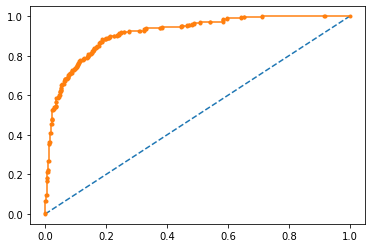

In [116]:
# AUC and ROC for the training data

# predict probabilities
probs = RF_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [117]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(x_test)
model_score = RF_model.score(x_test, y_test)
print(model_score)
print( confusion_matrix(y_test, y_test_predict))
print( classification_report(y_test, y_test_predict))

0.8296943231441049
[[291  37]
 [ 41  89]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       328
           1       0.71      0.68      0.70       130

    accuracy                           0.83       458
   macro avg       0.79      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



AUC: 0.898


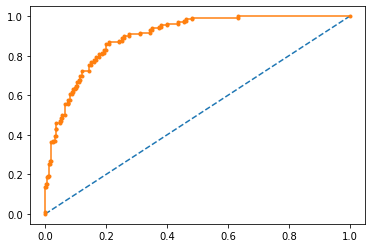

In [119]:
# predict probabilities
probs = RF_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Q8) Based on these predictions, what are the insights

1)Comparing all the performance measure, Naïve Bayes model from second iteration is performing best. Although there are some other models such as SVM and Extreme Boosting which is performing almost same as that of Naïve Bayes. But Naïve Bayes model is very consistent when train and test results are compared with each other. Along with other parameters such as Recall value, AUC_SCORE and AUC_ROC_Curve, those results were pretty good is this model.

2)Labour party is performing better than Conservative from huge margin.

3)Female voters turn out is greater than the male voters.

4)Those who have better national economic conditions are preferring to vote for Labour party.
5)Persons having higher Eurosceptic sentiments conservative party are preferring to vote for Conservative party.
6)Those who have higher political knowledge have voted for Conservative party
7)Looking at the assessment for both the leaders, Labour Leader is performing well as he has got better ratings in assessment.